# MACD Model

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date, timedelta
from sharpe import gen_sharpe
from fin_table_obj import Table
from macd_obj import MACDTable

Downloading Data:

In [2]:
# YYYY-MM-DD
# for current day: str(date.today() - timedelta(1))
end = str(date.today() - timedelta(1))
# for 60 days ago for smaller timeframes: str(date.today() - timedelta(59))
start = str(date.today() - timedelta(59))

# model trading days input for crossover visualization in days. standard 1Y is 252 days. Can use multiples of 252 to track years
model_days = 60

#multi_level_index = False | removes ticker noise in table
QQQ = (yf.download("QQQ", start, end, interval="2m", multi_level_index = False))


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


# Complete Table Creation

In [3]:
QQQ_macd = MACDTable(QQQ)
QQQ_macd.gen_table()

,Day Count,Open,High,Low,Close,12-day EMA,26-day EMA,MACD Signal Line,MACD Line,MACD Histogram,Return,Cumulative Return,MACD Model Return,Cumulative MACD Model Return,Signal,Entry
Datetime,,,,,,,,,,,,,,,,
2025-03-14 14:22:00+00:00,27,474.28,474.920,474.000,474.795,474.810,475.626,0.000,-0.815,-0.815,NaN,NaN,-0.121,-0.121,-1,-1.0
2025-03-14 14:24:00+00:00,28,474.76,475.125,474.560,474.620,474.808,475.564,-0.163,-0.756,-0.593,-0.037,-0.037,0.037,-0.084,-1,0.0
2025-03-14 14:26:00+00:00,29,474.54,474.569,473.845,474.210,474.779,475.494,-0.282,-0.715,-0.433,-0.086,-0.123,0.086,0.002,-1,0.0
2025-03-14 14:28:00+00:00,30,474.31,474.580,473.650,474.030,474.691,475.399,-0.368,-0.708,-0.339,-0.038,-0.161,0.038,0.040,-1,0.0
2025-03-14 14:30:00+00:00,31,474.01,474.870,473.930,474.600,474.590,475.298,-0.436,-0.708,-0.272,0.120,-0.041,-0.120,-0.080,-1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-25 19:50:00+00:00,5846,471.23,472.070,471.190,471.892,471.236,471.426,-0.129,-0.190,-0.061,0.155,-0.611,-0.155,7.671,-1,0.0
2025-04-25 19:52:00+00:00,5847,471.87,472.500,471.870,472.395,471.337,471.460,-0.141,-0.124,0.017,0.107,-0.505,0.107,7.786,1,2.0
2025-04-25 19:54:00+00:00,5848,472.43,472.740,472.125,472.410,471.500,471.530,-0.138,-0.030,0.108,0.003,-0.502,0.003,7.789,1,0.0


# Buy/Hold Returns Comparison

QQQ Cumulative Buy/Hold Return: -0.47
QQQ Cumulative MACD Model Return: 7.82


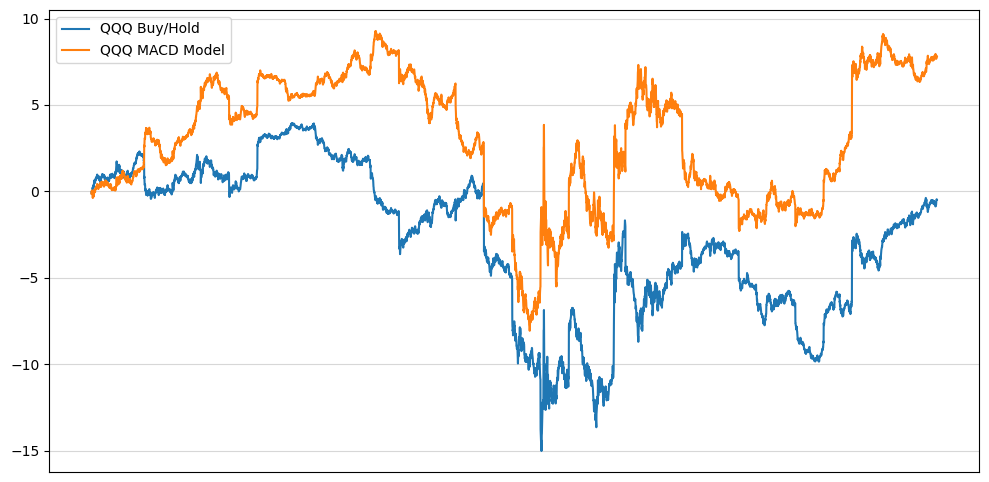

In [4]:
QQQ_macd.print_cumulative_return("QQQ")
QQQ_macd.gen_buyhold_comp("QQQ")

# Buy/Sell Signal Visualization (Proof)

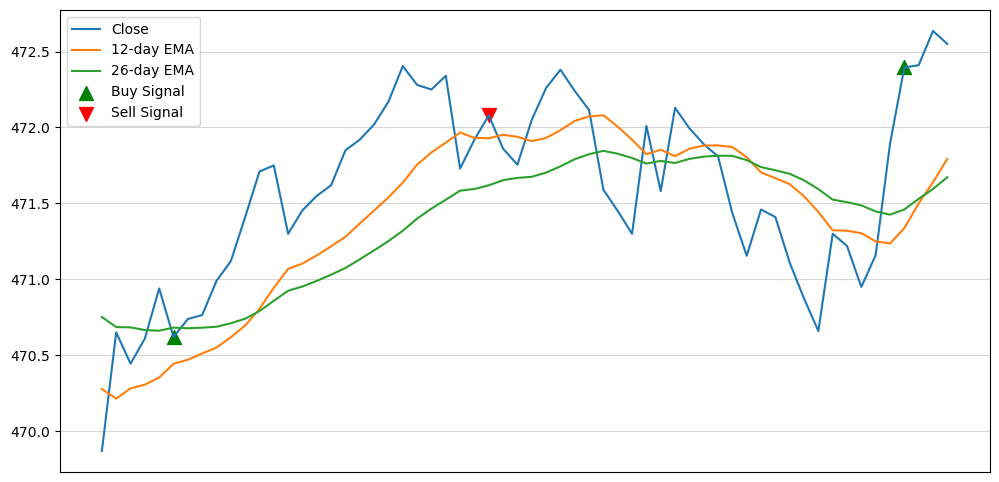

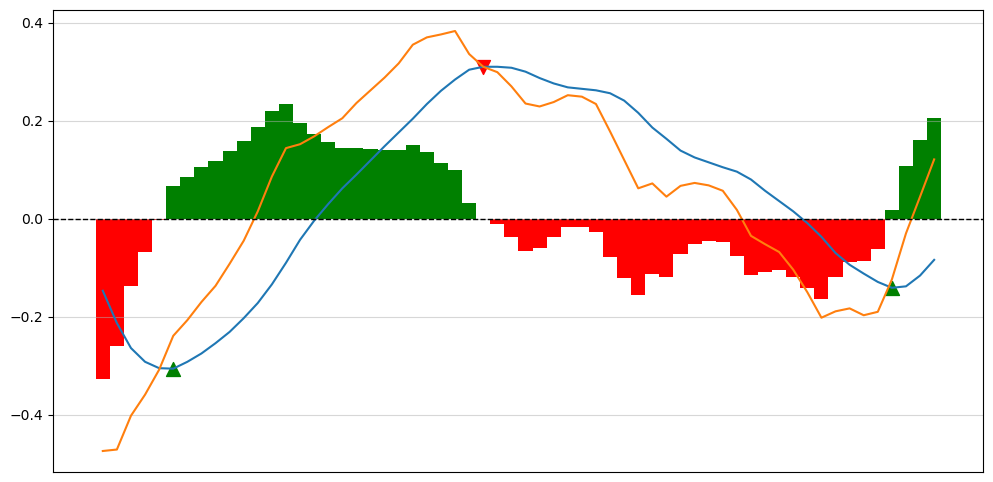

In [5]:
QQQ_macd.gen_macd_visual(model_days) 

# Sharpe Ratio:

In [6]:
print('QQQ Buy/Hold Sharpe Ratio:', round(gen_sharpe(QQQ_macd.gen_table()['Return']), 2))
print('QQQ MACD Model Sharpe Ratio:', round(gen_sharpe(QQQ_macd.gen_table()['MACD Model Return']), 2))

QQQ Buy/Hold Sharpe Ratio: -0.01
QQQ MACD Model Sharpe Ratio: 0.1
